# Problem 2b_i

In [1]:
# Loading Data
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
raw_data = pd.read_csv('network_backup_dataset.csv')


# Preprocess raw_data to data (numerical representation)
weekdays = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data = np.zeros(raw_data.shape)
for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        if j == 1: # Day of week
            data[i][j] = float(weekdays[raw_data.loc[i]['Day of Week']])
        elif j == 3: # workflow id
            data[i][j] = float(raw_data.loc[i]['Work-Flow-ID'].split('_')[-1])
        elif j == 4: # file name id
            data[i][j] = float(raw_data.loc[i]['File Name'].split('_')[-1])
        else:
            data[i][j] = float(raw_data.loc[i][j])


In [2]:
from sklearn.preprocessing import OneHotEncoder
X = data[:,0:5]
y = data[:,5]

enc = OneHotEncoder()
data_encoding = enc.fit_transform(X)

Fold 1: train RMSE = 0.0601325887946782, test RMSE = 0.06764152379547483
Fold 2: train RMSE = 0.06083261483175599, test RMSE = 0.05242601538392144
Fold 3: train RMSE = 0.06016772995727187, test RMSE = 0.06747281649644984
Fold 4: train RMSE = 0.06086273326377721, test RMSE = 0.05266729846516659
Fold 5: train RMSE = 0.06015542539293524, test RMSE = 0.06743518631707518
Fold 6: train RMSE = 0.06100784536945319, test RMSE = 0.053992273076582935
Fold 7: train RMSE = 0.060132961421847965, test RMSE = 0.0677834892781816
Fold 8: train RMSE = 0.0599484073641178, test RMSE = 0.051730396944450294
Fold 9: train RMSE = 0.060104479642248305, test RMSE = 0.0673164232394233
Fold 10: train RMSE = 0.06087543181581384, test RMSE = 0.05282563637700973


/Users/dui/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Out of bag error:  0.655622630169


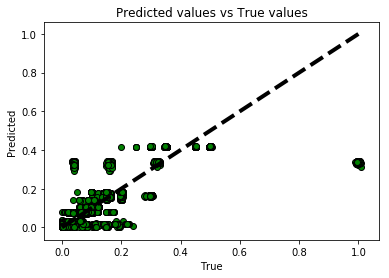

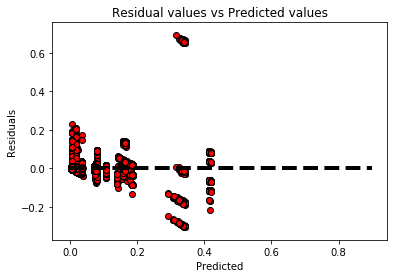

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from math import sqrt


rf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                           bootstrap=True, oob_score=False, n_jobs=-1)
kf = KFold(10)

k = 1
for train_index, test_index in kf.split(X): # kf.split() returns sets of train_index and test_index
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    
    pred_train, pred_test = rf.predict(X_train), rf.predict(X_test)
    
    rmse_train = sqrt(mean_squared_error(y_train, pred_train))
    rmse_test = sqrt(mean_squared_error(y_test, pred_test))
    
    print("Fold %s: train RMSE = %s, test RMSE = %s" % (k, rmse_train, rmse_test))
    k += 1

rf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                           bootstrap=True, n_jobs=-1)
predicted = cross_val_predict(rf, X, y, cv=10)

rf = RandomForestRegressor(n_estimators=20, max_features=5, max_depth=4, 
                           bootstrap=True, oob_score=True, n_jobs=-1)
rf.fit(X, y)
oob = rf.oob_score_
print("Out of bag error: ", oob)


fig1, ax1 = plt.subplots()
ax1.scatter(y, predicted, color = 'g', edgecolors=(0, 0, 0))
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax1.set_title('Predicted values vs True values')
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
# plt.show()

fig2, ax2 = plt.subplots()
residuals = y - predicted
ax2.scatter(predicted, residuals, color = 'r', edgecolors=(0, 0, 0))
ax2.plot(np.arange(0, 1, 0.1), np.zeros(10), 'k--', lw=4)
ax2.set_title('Residual values vs Predicted values')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Residuals')

plt.show()



# Problem 2b_ii

In [4]:
# num_trees_min = 1
# num_trees_max = 200
# num_features_min = 1
# num_features_max = 5

import warnings
warnings.filterwarnings('ignore')

bag_errors = []
rmses = []
for num_features in range(1, 6): # sweep from 1 to 5
    bag_errors_for_cur_feature = []
    rmses_cur_feature = []
    for num_trees in range(1, 201): # sweep from 1 to 201
        rf = RandomForestRegressor(n_estimators=num_trees, max_features=num_features, max_depth=4, 
                           bootstrap=True, oob_score=True, n_jobs=-1)
        
        rf.fit(X_train, y_train)
        # rf.fit(X, y)
        y_pred = rf.predict(X_test)
        # note that oob_error = 1 - rf.oob_score_
        bag_errors_for_cur_feature.append(1 - rf.oob_score_)
        
        rmses_cur_feature.append(sqrt(mean_squared_error(y_test, y_pred)))
        
    rmses.append(rmses_cur_feature)
    bag_errors.append(bag_errors_for_cur_feature)

0.546028605649
0.40123150217
0.352106655866
0.35475783172
0.348286244498
2
best feature index: 5
best tree num: 3


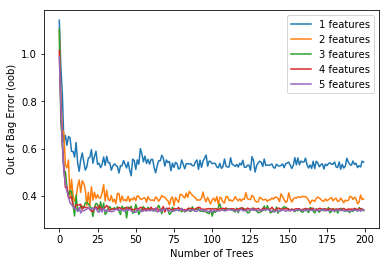

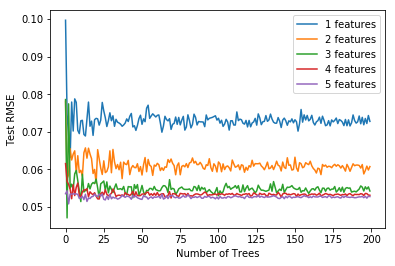

In [5]:
# print(len(bag_errors))
index_bag_errors = -1;

min = 10000;
for i in range(5):
    print(np.mean(bag_errors[i]))
    if (np.mean(bag_errors[i]) < min):
        min = np.mean(bag_errors[i])
        index_bag_errors = i
print(np.argmin(rmses[4]))
best_num_tree = np.argmin(rmses[4])
print("best feature index: " + str(index_bag_errors + 1))
print("best tree num: " + str(best_num_tree + 1))


#Figure 1

fig1, ax1 = plt.subplots()
i = 0
for oob in bag_errors:
    ax1.plot(oob, label=str(i+1)+" features")
    i+=1
    
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Out of Bag Error (oob)')
plt.legend()

# Figure 2 
fig2, ax2 = plt.subplots()
i=0
for rmse in rmses:
    ax2.plot(rmse, label=str(i+1)+" features")
    i+=1
    
ax2.set_xlabel('Number of Trees')
ax2.set_ylabel('Test RMSE')
plt.legend()

plt.show()

Out of bag error:  0.419606118652


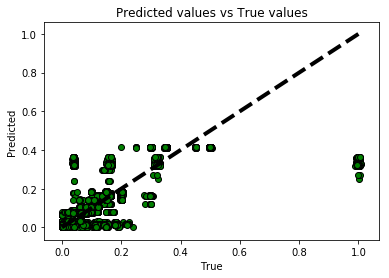

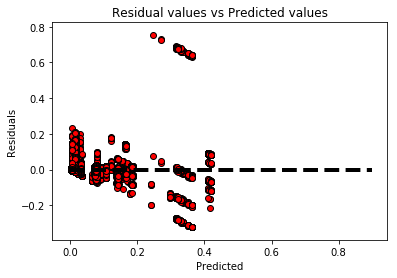

In [6]:
# visualize current optimized result 
rf = RandomForestRegressor(n_estimators=best_num_tree + 1, max_features=index_bag_errors + 1, max_depth=4, 
                           bootstrap=True, n_jobs=-1)
predicted = cross_val_predict(rf, X, y, cv=10)

rf = RandomForestRegressor(n_estimators=best_num_tree + 1, max_features=index_bag_errors + 1, max_depth=4, 
                           bootstrap=True, oob_score=True, n_jobs=-1)
rf.fit(X, y)
oob = rf.oob_score_
print("Out of bag error: ", oob)


fig1, ax1 = plt.subplots()
ax1.scatter(y, predicted, color = 'g', edgecolors=(0, 0, 0))
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax1.set_title('Predicted values vs True values')
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
# plt.show()

fig2, ax2 = plt.subplots()
residuals = y - predicted
ax2.scatter(predicted, residuals, color = 'r', edgecolors=(0, 0, 0))
ax2.plot(np.arange(0, 1, 0.1), np.zeros(10), 'k--', lw=4)
ax2.set_title('Residual values vs Predicted values')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Residuals')

plt.show()

# Problem 2b_iii

In [7]:
import warnings
warnings.filterwarnings('ignore')

min_depth = 1
max_depth = 20

bag_errors = []
test_rmses = []
train_rmses = []
depths = np.linspace(1, max_depth, max_depth)

for depth in range(min_depth, max_depth+1):
    rf = RandomForestRegressor(n_estimators=best_num_tree + 1, max_features=index_bag_errors + 1, max_depth=depth, 
                       bootstrap=True, oob_score=True, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    bag_errors.append(1-rf.oob_score_)
    train_rmses.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    test_rmses.append(sqrt(mean_squared_error(y_test, y_pred)))


No handles with labels found to put in legend.


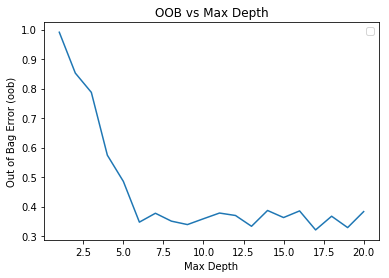

In [8]:
#Figure 1
fig, ax = plt.subplots()
ax.plot(depths, bag_errors)

ax.set_title('OOB vs Max Depth')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Out of Bag Error (oob)')
plt.legend()
plt.show()

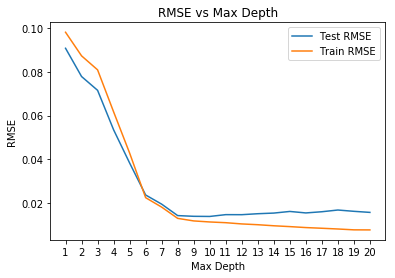

In [9]:
fig, ax = plt.subplots()

ax.plot(depths, test_rmses, label="Test RMSE")
ax.plot(depths, train_rmses, label="Train RMSE")    
ax.set_xticks(depths)
ax.set_title('RMSE vs Max Depth')
ax.set_xlabel('Max Depth')
ax.set_ylabel('RMSE')
plt.legend()
plt.show()

### According to the results above, we choose 8 as best depth:

Out of bag error:  0.683065835564


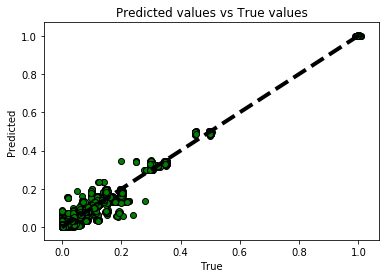

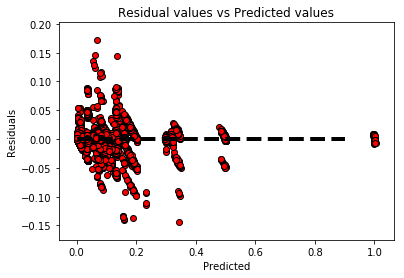

In [10]:
# visualize current optimized result 
rf = RandomForestRegressor(n_estimators= best_num_tree + 1, max_features=5, max_depth=8, 
                           bootstrap=True, n_jobs=-1)
predicted = cross_val_predict(rf, X, y, cv=10)

rf = RandomForestRegressor(n_estimators= best_num_tree + 1, max_features=5, max_depth=8, 
                           bootstrap=True, oob_score=True, n_jobs=-1)
rf.fit(X, y)
oob = rf.oob_score_
print("Out of bag error: ", oob)


fig1, ax1 = plt.subplots()
ax1.scatter(y, predicted, color = 'g', edgecolors=(0, 0, 0))
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax1.set_title('Predicted values vs True values')
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
# plt.show()

fig2, ax2 = plt.subplots()
residuals = y - predicted
ax2.scatter(predicted, residuals, color = 'r', edgecolors=(0, 0, 0))
ax2.plot(np.arange(0, 1, 0.1), np.zeros(10), 'k--', lw=4)
ax2.set_title('Residual values vs Predicted values')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Residuals')

plt.show()

# Problem 2b_iv

Feature ranking:
1. feature 2 (0.379323)
2. feature 4 (0.265065)
3. feature 1 (0.217478)
4. feature 3 (0.137053)
5. feature 0 (0.001082)


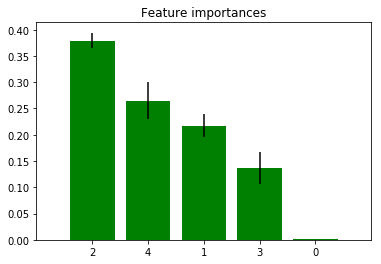

In [11]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestRegressor(n_estimators= best_num_tree + 1, max_features=5, max_depth=8, 
                   bootstrap=True, oob_score=True, n_jobs=-1)
rf.fit(X, y)
importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
# Problem 2b_v

In [23]:
from sklearn.tree import export_graphviz
import graphviz

rf = RandomForestRegressor(n_estimators=best_num_tree + 1, max_features=5, max_depth=4, 
                   bootstrap=True, oob_score=True, n_jobs=-1)
rf.fit(X, y)
estimator_0 = rf.estimators_[0]
estimator_1 = rf.estimators_[1]


export_graphviz(estimator_1, out_file='tree.dot')
with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph).view()


'Source.gv.pdf'

# Problem 2c

In [35]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

enc = OneHotEncoder()
train_encoded = enc.fit_transform(X_train)
train_encoded_arr = train_encoded.toarray()

test_encoded = enc.transform(X_test)
test_encoded_arr = test_encoded.toarray()

In [36]:
from sklearn.neural_network import MLPRegressor
import itertools

hidden_layers = [20, 50, 100, 200, 300, 400, 500]
activation_types = ['relu', 'logistic', 'tanh']

rmses = {}
for combo in list(itertools.product(activation_types,hidden_layers)):
    num_hidden = (combo[1], )
    activation = combo[0]

    mlp = MLPRegressor(hidden_layer_sizes=num_hidden, activation=activation)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    rmses[combo] = sqrt(mean_squared_error(y_test, y_pred))

min_rmse_relu: 0.0721823283984
min_rmse_logistic: 0.0889311078065
min_rmse_tanh: 0.0833943666126


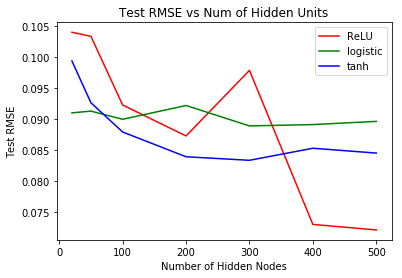

In [37]:
relu_x = []
relu_y = []
logistic_x = []
logistic_y = []
tanh_x = []
tanh_y = []

for combo, rmse in rmses.items():
    activation = combo[0]
    if activation is 'relu':
        relu_x.append(combo[1])
        relu_y.append(rmse)
    elif activation is 'logistic':
        logistic_x.append(combo[1])
        logistic_y.append(rmse)
    elif activation is 'tanh':
        tanh_x.append(combo[1])
        tanh_y.append(rmse)

#plot RMSE (y-axis) vs. num hidden layers. This plot will have 3 curves, one for each activation type.
fig, ax = plt.subplots()

print('min_rmse_relu: ' + str(np.amin(relu_y)))
print('min_rmse_logistic: ' + str(np.amin(logistic_y)))
print('min_rmse_tanh: ' + str(np.amin(tanh_y)))

ax.plot(relu_x, relu_y, color = 'r', label='ReLU')
ax.plot(logistic_x, logistic_y, color = 'g', label='logistic')
ax.plot(tanh_x, tanh_y, color = 'b', label='tanh')

ax.set_title('Test RMSE vs Num of Hidden Units')
ax.set_xlabel('Number of Hidden Nodes')
ax.set_ylabel('Test RMSE')
plt.legend()
plt.show()